# Galileo - Chain Pool Eval

### Imports

In [1]:
import os
import matplotlib.pyplot as plt

from src.constants import Constant as c
from src.chain_poll import ChainPollEval

/Users/neel/Library/Caches/pypoetry/virtualenvs/src-ySEjC4LY-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Run Eval

In [2]:
api_key = c.OPENAI_API_KEY
model = "gpt-4o"
cp = ChainPollEval(api_key=api_key, model=model)
cp.load_data(path="../data/galileo_prompts_mapped.csv", subset="drop")
cp.run_eval(parallel=True)

Evaluating: 100%|██████████| 180/180 [00:37<00:00,  4.82it/s]


In [3]:
cp.save_records(save_dir="../data/runs")

### Generate Eval Report

In [4]:
df = ChainPollEval.get_report(path="../data/runs")

In [5]:
df.to_csv("../data/report-raw-drop-single-calls.csv")
df

,record_no,source,doc_type,question,response,score,cp_score,ragas_score
0,1,drop,single,How many more members did the Front have in 19...,The National Front had a higher membership in ...,False,0.4,0.428571
1,2,drop,single,How many percent were not males 65 or older li...,91.2% of the households were not males 65 year...,False,0.6,0.333333
2,3,drop,single,How many total passes did Andrew Luck throw?,Andrew Luck threw a total of 39 passes in the ...,True,1.0,1.000000
3,4,drop,single,How many more Mormons were there compared to M...,"There were 81,000 more Mormons than Muslims.",True,1.0,1.000000
4,5,drop,single,How many games did the Ravens win during the p...,"The Ravens won one playoff game and lost one, ...",True,1.0,1.000000
...,...,...,...,...,...,...,...,...
175,176,drop,single,How many percent of Forth Worth commuters did ...,"In 2009, 19.4% of Fort Worth commuters did not...",True,1.0,1.000000
176,177,drop,single,How many incomplete passes did Kurt Warner have?,Kurt Warner had 12 incomplete passes.,False,1.0,1.000000
177,178,drop,single,Which gender group is larger: females or males?,"Based on the provided information, the female ...",True,1.0,1.000000
178,179,drop,single,Was the birth rate or death rate higher in 2007?,The birth rate was higher in 2007.,True,0.4,1.000000


In [7]:
cp.get_record_info(record_no=2)

QUESTION - ['anila name meaning']
RESPONSE - ['The name Anila has various meanings depending on the origin and language. In Indian, it means "children of the wind." In Sanskrit, it means "the wind god." In Sindhi, the name Anila is a girl\'s name.']
SOURCE - ['msmarco']
[{'judgement': 'Yes',
  'reasonings': [{'document': 1,
                  'reasoning': 'Document 1 mentions that Anila is an Indian '
                               "name meaning 'children of the wind'. It is a "
                               'girl’s name and is of Indian origin. This '
                               "supports the Response's claim about the Indian "
                               'meaning and gender of the name Anila.'},
                 {'document': 2,
                  'reasoning': 'Document 2 talks about the popularity of the '
                               'name Anila in the U.S. and confirms that it is '
                               "a girl's name. It does not provide information "
             

array([list([{'reasonings': [{'document': 1, 'reasoning': "Document 1 mentions that Anila is an Indian name meaning 'children of the wind'. It is a girl’s name and is of Indian origin. This supports the Response's claim about the Indian meaning and gender of the name Anila."}, {'document': 2, 'reasoning': "Document 2 talks about the popularity of the name Anila in the U.S. and confirms that it is a girl's name. It does not provide information about the meaning or origin, so it neither supports nor contradicts the Response."}, {'document': 3, 'reasoning': 'Document 3 refers to a dictionary source where one can find the meaning and definition of the name Anila. It does not provide specific meanings or origins itself, so it does not directly support the Response.'}, {'document': 4, 'reasoning': 'Document 4 is about the name Anita, which is not relevant to the evaluation of the Response about Anila.'}, {'document': 5, 'reasoning': 'Document 5 also talks about the name Anita and its meaning

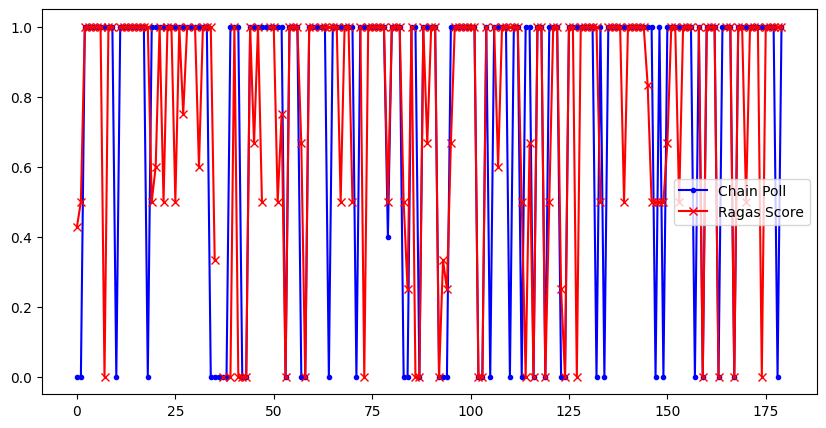

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(range(df.shape[0]), df["cp_score"], marker=".", label="Chain Poll", color="blue")
ax.plot(range(df.shape[0]), df["ragas_score"], marker="x", label="Ragas Score", color="red")

ax.legend()
plt.show()